# Machine Learning Models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
%matplotlib inline
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Emp_Model_df.csv')

In [3]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
df.shape

(546221, 46)

In [5]:
df["Attrition"].unique()

array([0., 1.])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546221 entries, 0 to 546220
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                546221 non-null  float64
 1   Attrition                          546221 non-null  float64
 2   DailyRate                          546221 non-null  float64
 3   DistanceFromHome                   546221 non-null  float64
 4   Education                          546221 non-null  float64
 5   EnvironmentSatisfaction            546221 non-null  float64
 6   HourlyRate                         546221 non-null  float64
 7   JobInvolvement                     546221 non-null  float64
 8   JobLevel                           546221 non-null  float64
 9   JobSatisfaction                    546221 non-null  float64
 10  MonthlyIncome                      546221 non-null  float64
 11  NumCompaniesWorked                 5462

In [7]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Training the ml models

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)
p = lr.predict(x_test)
p

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
print("Training Accuracy:",lr.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p))

Training Accuracy: 0.5033790675656591
------------------------------------------------------------
Testing Accuracy: 0.4990754697407043
------------------------------------------------------------
confusion_matrix:
 [[49965 31551]
 [50534 31817]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.61      0.55     81516
         1.0       0.50      0.39      0.44     82351

    accuracy                           0.50    163867
   macro avg       0.50      0.50      0.49    163867
weighted avg       0.50      0.50      0.49    163867



## Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier as dtc
r = dtc().fit(x_train,y_train)
p1 = r.predict(x_test)
p1

array([1., 1., 0., ..., 1., 0., 0.])

In [12]:
print("Training Accuracy:",r.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p1))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p1))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p1))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.5053244399421482
------------------------------------------------------------
confusion_matrix:
 [[41337 40179]
 [40882 41469]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.51      0.50     81516
         1.0       0.51      0.50      0.51     82351

    accuracy                           0.51    163867
   macro avg       0.51      0.51      0.51    163867
weighted avg       0.51      0.51      0.51    163867



## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier as rfc
random_forest = rfc().fit(x_train,y_train)
p2 = random_forest.predict(x_test)
p2

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
print("Training Accuracy:",random_forest.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p2))
print("------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p2))
print("------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p2))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.5023891326502591
------------------------------------------------------------------
confusion_matrix:
 [[44597 37228]
 [44314 37728]]
------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.55      0.52     81825
         1.0       0.50      0.46      0.48     82042

    accuracy                           0.50    163867
   macro avg       0.50      0.50      0.50    163867
weighted avg       0.50      0.50      0.50    163867



## K Nearest Neighbors Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc().fit(x_train,y_train)
p3 = knn.predict(x_test)
p3

array([0., 0., 0., ..., 1., 0., 0.])

In [15]:
print("Training Accuracy:",knn.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p3))
print("------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p3))
print("------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p3))

Training Accuracy: 0.6868870209282497
------------------------------------------------------------
Testing Accuracy: 0.49986269352584717
------------------------------------------------------------------
confusion_matrix:
 [[40902 40923]
 [41033 41009]]
------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     81825
         1.0       0.50      0.50      0.50     82042

    accuracy                           0.50    163867
   macro avg       0.50      0.50      0.50    163867
weighted avg       0.50      0.50      0.50    163867



## Gaussian Naive Bayes classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
p4 = gnb.predict(x_test)
p4

array([0., 1., 1., ..., 1., 1., 1.])

In [17]:
print("Training Accuracy:",gnb.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p4))
print("------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p4))
print("------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p4))

Training Accuracy: 0.503577836245992
------------------------------------------------------------
Testing Accuracy: 0.49803804304710525
------------------------------------------------------------------
confusion_matrix:
 [[34885 46940]
 [35315 46727]]
------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.43      0.46     81825
         1.0       0.50      0.57      0.53     82042

    accuracy                           0.50    163867
   macro avg       0.50      0.50      0.50    163867
weighted avg       0.50      0.50      0.50    163867



##  XGBoost 

In [13]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train,y_train)
p5 = xgb_classifier.predict(x_test)
p5

[20:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0., 1., 0., ..., 1., 0., 1.])

In [14]:
print("Training Accuracy:",xgb_classifier.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p5))
print("------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p5))
print("------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p5))

Training Accuracy: 0.6011235661193554
------------------------------------------------------------
Testing Accuracy: 0.5066425820940152
------------------------------------------------------------------
confusion_matrix:
 [[42347 39169]
 [41676 40675]]
------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     81516
         1.0       0.51      0.49      0.50     82351

    accuracy                           0.51    163867
   macro avg       0.51      0.51      0.51    163867
weighted avg       0.51      0.51      0.51    163867



## Gradient Boosting Classifier


In [15]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
gb=gbc().fit(x_train,y_train)
p6=gb.predict(x_test)
p6

array([0., 0., 0., ..., 1., 0., 0.])

In [16]:
print("Training Accuracy:",gb.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p6))
print("--------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p6))
print("--------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p6))

Training Accuracy: 0.5211531721912155
------------------------------------------------------------
Testing Accuracy: 0.5000274612948306
--------------------------------------------------------
confusion_matrix:
 [[48297 33219]
 [48710 33641]]
--------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.59      0.54     81516
         1.0       0.50      0.41      0.45     82351

    accuracy                           0.50    163867
   macro avg       0.50      0.50      0.50    163867
weighted avg       0.50      0.50      0.50    163867



##  Catboost 

In [17]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=30000, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train, 
     
        eval_set=(x_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())
p7=clf.predict(x_test)

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 30000, 'learning_rate': 0.1}


In [18]:
print("Training Accuracy:",clf.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p7))
print("--------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p7))
print("--------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p7))

Training Accuracy: 0.9106744012093505
------------------------------------------------------------
Testing Accuracy: 0.6148766987862108
--------------------------------------------------------
confusion_matrix:
 [[50296 31220]
 [31889 50462]]
--------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     81516
         1.0       0.62      0.61      0.62     82351

    accuracy                           0.61    163867
   macro avg       0.61      0.61      0.61    163867
weighted avg       0.61      0.61      0.61    163867



## Lightgbm

In [9]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='dart',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x_train, y_train),
p8 = lgbm.predict(x_test)

CPU times: total: 4h 11min 12s
Wall time: 1h 14min 8s


In [10]:
print("Training Accuracy:",lgbm.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p8))
print("--------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p8))
print("--------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p8))

Training Accuracy: 0.7772901551964932
------------------------------------------------------------
Testing Accuracy: 0.6781597270957544
--------------------------------------------------------
confusion_matrix:
 [[55722 26356]
 [26383 55406]]
--------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.68      0.68      0.68     82078
         1.0       0.68      0.68      0.68     81789

    accuracy                           0.68    163867
   macro avg       0.68      0.68      0.68    163867
weighted avg       0.68      0.68      0.68    163867



In [ ]:
from sklearn.model_selection import KFold
Kfold_validation=KFold(5)
from sklearn.model_selection import cross_val_score
results=cross_val_score(lgbm,x,y,cv=Kfold_validation)
print(results)

#### As Lightgbm got the highest accuracy among the models so we are using this model for deployement.

In [ ]:
lgbm.booster_.save_model('lgbm1.json')

In [21]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p1[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p5[:,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p6[:,], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, p7[:,], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, p8[:,], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [22]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, p[:,])
auc_score2 = roc_auc_score(y_test, p1[:,])
auc_score3 = roc_auc_score(y_test, p5[:,])
auc_score4 = roc_auc_score(y_test, p6[:,])
auc_score5 = roc_auc_score(y_test, p7[:,])
auc_score6 = roc_auc_score(y_test, p8[:,])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6)

0.4996527721065036 0.5053334563122298 0.5067077311946185 0.50049619859281 0.6148875024762757 0.6865038013041053


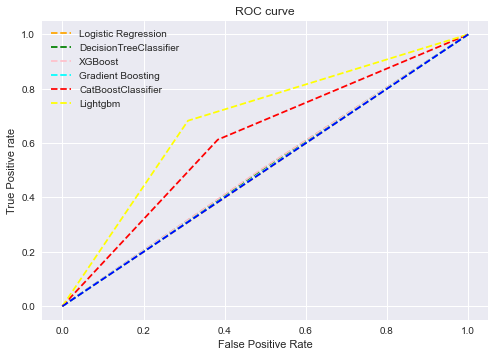

In [23]:
#matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTreeClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='pink', label='XGBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='Gradient Boosting')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='CatBoostClassifier')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Lightgbm')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

In [8]:
import autokeras as ak
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(x_train, y_train, epochs=50)
loss, acc = clf.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % acc)
model = clf.export_model()
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

Trial 3 Complete [00h 10m 40s]
val_accuracy: 0.5023941993713379

Best val_accuracy So Far: 0.5023941993713379
Total elapsed time: 00h 30m 42s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
11949/11949 [==============================] - 30s 2ms/step - loss: 0.7857 - accuracy: 0.5004
Epoch 2/50
11949/11949 [==============================] - 27s 2ms/step - loss: 0.7152 - accuracy: 0.5006
Epoch 3/50
11949/11949 [==============================] - 26s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 4/50
11949/11949 [==============================] - 27s 2ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 5/50
11949/11949 [==============================] - 35s 3ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 6/50
11949/11949 [==============================] - 49s 4ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 7/50
11949/11949 [==============================] - 59s 4ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 8/50
11949/11949 [==============================] - 45s 4ms/step - loss: 0.6932